## Importing the required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split

## Load the data

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd "/content/drive/My Drive/CMP7005"

/content/drive/My Drive/CMP7005


In [4]:
ls

 Application.doc   city_day.csv  'Colab Notebooks'/                                       view.htm
 aqi_data.csv      CMP7005/      'Ipynb files and the dataset for workshop 6-20241111'/


In [8]:
df=pd.read_csv('FuelConsumption.csv')

In [ ]:
print((df.to_string()))

      MODELYEAR           MAKE                              MODEL              VEHICLECLASS  ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0          2014          ACURA                                ILX                   COMPACT         2.0          4          AS5        Z                   9.9                  6.7                   8.5                        33           196
1          2014          ACURA                                ILX                   COMPACT         2.4          4           M6        Z                  11.2                  7.7                   9.6                        29           221
2          2014          ACURA                         ILX HYBRID                   COMPACT         1.5          4          AV7        Z                   6.0                  5.8                   5.9                        48           136
3          2014          ACURA  

## Data exploration

In [17]:
# Summarise the data
#print(df.describe())
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [18]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
print (cdf)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0            2.0          4                   8.5                        33   
1            2.4          4                   9.6                        29   
2            1.5          4                   5.9                        48   
3            3.5          6                  11.1                        25   
4            3.5          6                  10.6                        27   
...          ...        ...                   ...                       ...   
1062         3.0          6                  11.8                        24   
1063         3.2          6                  11.5                        25   
1064         3.0          6                  11.8                        24   
1065         3.2          6                  11.3                        25   
1066         3.2          6                  12.8                        22   

      CO2EMISSIONS  
0              196  
1        

## Plot to check whether the relationship between the independent and dependent variable is linear or not

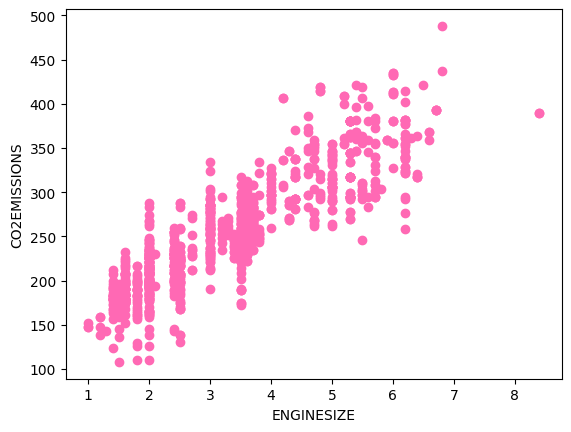

In [14]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color='hotpink')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

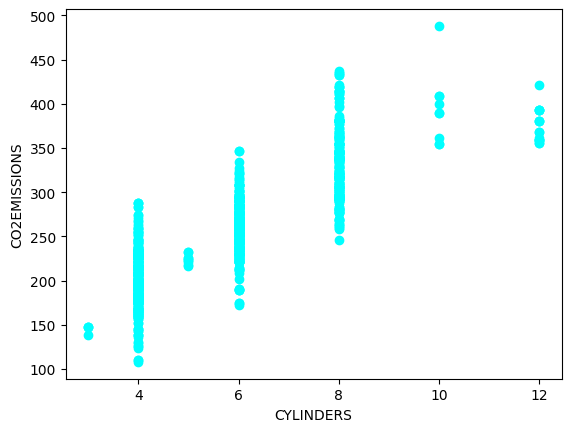

In [15]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS, color='cyan')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

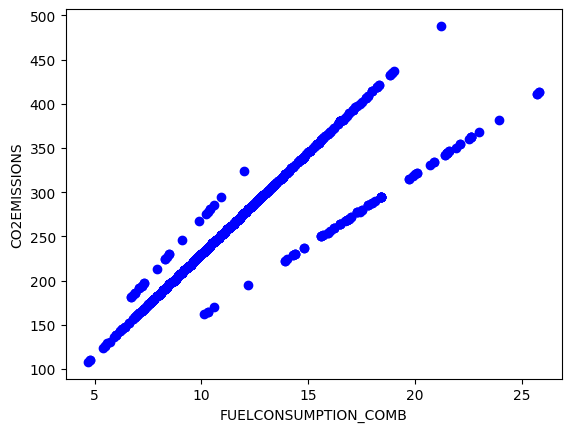

In [16]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

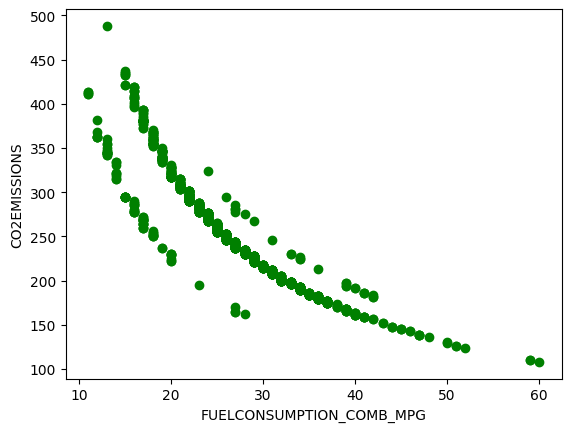

In [22]:
plt.scatter(df.FUELCONSUMPTION_COMB_MPG,df.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()


Which of the above variables do you think will work best to explain a linear relation with CO2 emission?

## Train-test data preparation

In [23]:
#selection of independent variable
X=df[['ENGINESIZE']]
X


,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [24]:
y=df[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train)

     ENGINESIZE
147         3.6
792         1.6
666         3.5
166         2.0
862         1.6
..          ...
553         5.0
939         1.0
538         5.6
233         2.0
316         2.4

[853 rows x 1 columns]


In [27]:
print(X_test)

     ENGINESIZE
781         1.6
696         2.5
238         4.3
878         3.8
584         5.7
..          ...
66          2.0
656         2.5
335         1.4
245         5.3
510         2.4

[214 rows x 1 columns]


In [28]:
print(y_train)

     CO2EMISSIONS
147           264
792           191
666           253
166           248
862           177
..            ...
553           290
939           147
538           294
233           228
316           202

[853 rows x 1 columns]


In [29]:
print(X_test)

     ENGINESIZE
781         1.6
696         2.5
238         4.3
878         3.8
584         5.7
..          ...
66          2.0
656         2.5
335         1.4
245         5.3
510         2.4

[214 rows x 1 columns]


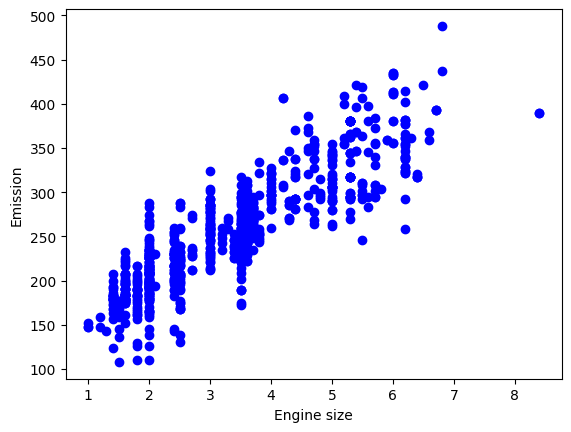

In [30]:
# Train data distribution
plt.scatter(X_train,y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Using sklearn package for data modelling

In [31]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.34564472]]
Intercept: [124.29893085]


Text(0, 0.5, 'Emission')

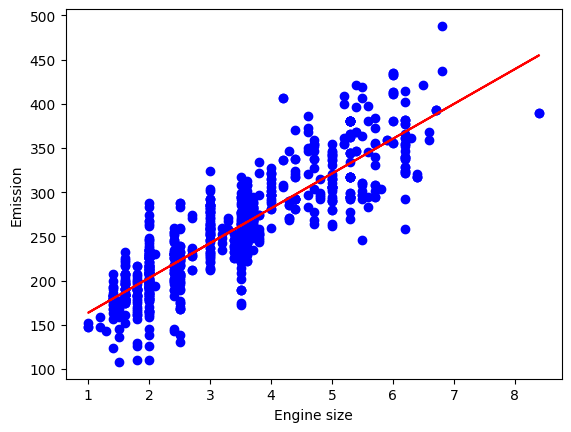

In [32]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model evaluation

In [33]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [34]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 23.51
Residual sum of squares (MSE): 996.51
R2-score: 0.66
